In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns', None)

#### Análise Exploratória de Dados

In [4]:
df = pd.read_excel(r'D:\ml_covid\dataset_obito.xlsx')

In [5]:
df.head(15)

,idade,sexo,raca,tagabismo,comorbidade1,comorbidade2,comorbidade3,comorbidade4,trombo_na_internacao,desfecho,anti-inflamatorio1,anti-inflamatorio2,anti-inflamatorio3,anti-inflamatorio_previo,profilaxia_de_trombo1,profilaxia_de_trombo2,anticoagulante_previo,antibiotico1,antibiotico2,proteina c (mg/dl),ferritina (ng/ml),leucócitos ( /ul),creatinina (mg/dl),ureia(mg/dl),d-dimeros (ng/ml),reinfeccao,sintomas
0,41,M,branca,nao,nenhuma,nenhuma,nenhum,nenhum,nenhum,0,nenhum,nenhum,nenhum,Nao,"heparina 5000UI/0,25mL",nenhum,Sim,NaN,NaN,8.0,0,4830,0.76,36.0,0,nao,leve
1,77,F,branca,sim,HAS,nenhuma,nenhum,nenhum,nenhum,0,hidrocortisona 100mg,prednisona 20mg,nenhum,Nao,"enonenhumaparina 40mg/0,4mL",nenhum,Sim,NaN,NaN,14.7,0,5280,0.82,31.0,0,nao,assintom
2,67,M,branca,previo,HAS,DM,nenhum,nenhum,nenhum,0,nenhum,nenhum,nenhum,Nao,"heparina 5000UI/0,25mL",nenhum,Sim,NaN,NaN,0.0,0,8650,0.72,0.0,0,nao,leve
3,51,M,branca,nao,HAS,renal-hd,nenhum,nenhum,nenhum,0,prednisona 20mg,nenhum,nenhum,Sim,nenhum,nenhum,Nao,NaN,NaN,6.2,0,9590,0.00,142.0,0,nao,leve
4,51,M,branca,nao,HAS,renal-hd,nenhum,nenhum,nenhum,0,"denenhumametasona 4mg/mL 2,5mL",hidrocortisona 100mg,prednisona 20mg,Nao,nenhum,nenhum,Nao,NaN,NaN,32.0,0,4230,15.40,158.0,1535,sim,assintom
5,64,F,branca,nao,HAS,nenhuma,nenhum,nenhum,nenhum,0,nenhum,nenhum,nenhum,Nao,"heparina 5000UI/0,25mL",nenhum,Sim,NaN,NaN,4.1,1530,6430,1.00,52.0,0,nao,leve
6,38,M,preta,nao,renal-hd,nenhuma,nenhum,nenhum,nenhum,0,hidrocortisona 100mg,prednisona 20mg,nenhum,Sim,"heparina 5000UI/0,25mL",nenhum,Nao,NaN,NaN,19.3,2380,1260,7.35,191.0,1021,nao,leve
7,37,M,branca,sim,HIV,oncologico,nenhum,nenhum,TVP,0,tiamina 300mg,piridonenhumina 40mg,nenhum,Nao,"enonenhumaparina 40mg/0,4mL",nenhum,Sim,NaN,NaN,4.8,0,4410,0.68,31.0,437,nao,leve
8,82,F,branca,nao,HAS,oncologico,nenhum,nenhum,nenhum,1,nenhum,nenhum,nenhum,Nao,"enonenhumaparina 40mg/0,4mL",nenhum,Sim,NaN,NaN,0.0,0,0,0.00,0.0,0,nao,assintom
9,45,M,branca,nao,nenhuma,nenhuma,nenhum,nenhum,ambos,0,nenhum,nenhum,nenhum,Nao,"enonenhumaparina 40mg/0,4mL","enonenhumaparina 60mg/0,6mL",Sim,NaN,NaN,17.2,366,2790,1.08,22.0,0,nao,leve


Valores Vazios
- Deletar linhas/colunas vazias
- Deletar linhas que possuem valores vazios
- Preencher valores vazios (último valor)

In [6]:
# deletar linhas e colunas completamente vazias
# df = df.dropna(how='all', axis=1)

# deletar linhas que possuem pelo menos 1 valor vazio
# df = df.dropna()

In [7]:
# preencher com o último valor
df = df.ffill()

In [8]:
# deletar colunas incompletas
df = df.drop(columns='antibiotico1')
df = df.drop(columns='antibiotico2')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idade                     429 non-null    int64  
 1   sexo                      429 non-null    object 
 2   raca                      429 non-null    object 
 3   tagabismo                 429 non-null    object 
 4   comorbidade1              429 non-null    object 
 5   comorbidade2              429 non-null    object 
 6   comorbidade3              429 non-null    object 
 7   comorbidade4              429 non-null    object 
 8   trombo_na_internacao      429 non-null    object 
 9   desfecho                  429 non-null    int64  
 10  anti-inflamatorio1        429 non-null    object 
 11  anti-inflamatorio2        429 non-null    object 
 12  anti-inflamatorio3        429 non-null    object 
 13  anti-inflamatorio_previo  429 non-null    object 
 14  profilaxia

In [9]:
df.head(15)

,idade,sexo,raca,tagabismo,comorbidade1,comorbidade2,comorbidade3,comorbidade4,trombo_na_internacao,desfecho,anti-inflamatorio1,anti-inflamatorio2,anti-inflamatorio3,anti-inflamatorio_previo,profilaxia_de_trombo1,profilaxia_de_trombo2,anticoagulante_previo,proteina c (mg/dl),ferritina (ng/ml),leucócitos ( /ul),creatinina (mg/dl),ureia(mg/dl),d-dimeros (ng/ml),reinfeccao,sintomas
0,41,M,branca,nao,nenhuma,nenhuma,nenhum,nenhum,nenhum,0,nenhum,nenhum,nenhum,Nao,"heparina 5000UI/0,25mL",nenhum,Sim,8.0,0,4830,0.76,36.0,0,nao,leve
1,77,F,branca,sim,HAS,nenhuma,nenhum,nenhum,nenhum,0,hidrocortisona 100mg,prednisona 20mg,nenhum,Nao,"enonenhumaparina 40mg/0,4mL",nenhum,Sim,14.7,0,5280,0.82,31.0,0,nao,assintom
2,67,M,branca,previo,HAS,DM,nenhum,nenhum,nenhum,0,nenhum,nenhum,nenhum,Nao,"heparina 5000UI/0,25mL",nenhum,Sim,0.0,0,8650,0.72,0.0,0,nao,leve
3,51,M,branca,nao,HAS,renal-hd,nenhum,nenhum,nenhum,0,prednisona 20mg,nenhum,nenhum,Sim,nenhum,nenhum,Nao,6.2,0,9590,0.00,142.0,0,nao,leve
4,51,M,branca,nao,HAS,renal-hd,nenhum,nenhum,nenhum,0,"denenhumametasona 4mg/mL 2,5mL",hidrocortisona 100mg,prednisona 20mg,Nao,nenhum,nenhum,Nao,32.0,0,4230,15.40,158.0,1535,sim,assintom
5,64,F,branca,nao,HAS,nenhuma,nenhum,nenhum,nenhum,0,nenhum,nenhum,nenhum,Nao,"heparina 5000UI/0,25mL",nenhum,Sim,4.1,1530,6430,1.00,52.0,0,nao,leve
6,38,M,preta,nao,renal-hd,nenhuma,nenhum,nenhum,nenhum,0,hidrocortisona 100mg,prednisona 20mg,nenhum,Sim,"heparina 5000UI/0,25mL",nenhum,Nao,19.3,2380,1260,7.35,191.0,1021,nao,leve
7,37,M,branca,sim,HIV,oncologico,nenhum,nenhum,TVP,0,tiamina 300mg,piridonenhumina 40mg,nenhum,Nao,"enonenhumaparina 40mg/0,4mL",nenhum,Sim,4.8,0,4410,0.68,31.0,437,nao,leve
8,82,F,branca,nao,HAS,oncologico,nenhum,nenhum,nenhum,1,nenhum,nenhum,nenhum,Nao,"enonenhumaparina 40mg/0,4mL",nenhum,Sim,0.0,0,0,0.00,0.0,0,nao,assintom
9,45,M,branca,nao,nenhuma,nenhuma,nenhum,nenhum,ambos,0,nenhum,nenhum,nenhum,Nao,"enonenhumaparina 40mg/0,4mL","enonenhumaparina 60mg/0,6mL",Sim,17.2,366,2790,1.08,22.0,0,nao,leve


In [10]:
view = df[['comorbidade1','comorbidade2','comorbidade3','comorbidade4', 'desfecho']]
display(view)

,comorbidade1,comorbidade2,comorbidade3,comorbidade4,desfecho
0,nenhuma,nenhuma,nenhum,nenhum,0
1,HAS,nenhuma,nenhum,nenhum,0
2,HAS,DM,nenhum,nenhum,0
3,HAS,renal-hd,nenhum,nenhum,0
4,HAS,renal-hd,nenhum,nenhum,0
...,...,...,...,...,...
424,HAS,nenhuma,nenhum,nenhum,0
425,nenhuma,nenhuma,nenhum,nenhum,0
426,DM,HAS,nenhum,nenhum,0
427,HAS,ICC,nenhum,nenhum,0


In [11]:
df['desfecho']==1  # DESFECHO (1-alta/ 2-UTI/ 3-óbito/4-fim isolamento/5-transf.)

0      False
1      False
2      False
3      False
4      False
       ...  
424    False
425    False
426    False
427    False
428    False
Name: desfecho, Length: 429, dtype: bool

#### Calculando e imprimindo histogramas sobre colunas numéricas

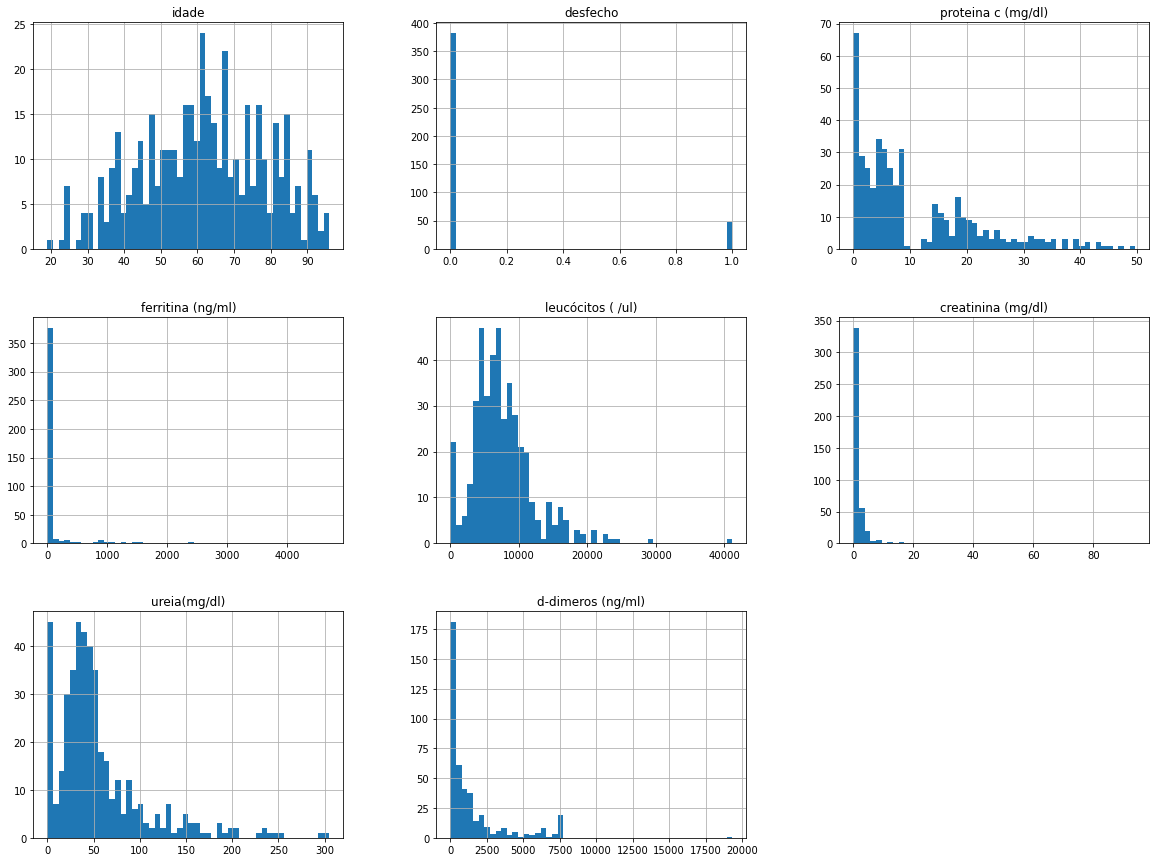

In [12]:
#%matplotlib inline # only in a Jupyter notebook
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.show()

#### Ajustando a escala dos atributos numéricos quantitativos

In [13]:
print('Menor valor de idade: ', df['idade'].min())
print('Maior valor de idade: ', df['idade'].max())

Menor valor de idade:  19
Maior valor de idade:  96


In [14]:
df.head(15)

,idade,sexo,raca,tagabismo,comorbidade1,comorbidade2,comorbidade3,comorbidade4,trombo_na_internacao,desfecho,anti-inflamatorio1,anti-inflamatorio2,anti-inflamatorio3,anti-inflamatorio_previo,profilaxia_de_trombo1,profilaxia_de_trombo2,anticoagulante_previo,proteina c (mg/dl),ferritina (ng/ml),leucócitos ( /ul),creatinina (mg/dl),ureia(mg/dl),d-dimeros (ng/ml),reinfeccao,sintomas
0,41,M,branca,nao,nenhuma,nenhuma,nenhum,nenhum,nenhum,0,nenhum,nenhum,nenhum,Nao,"heparina 5000UI/0,25mL",nenhum,Sim,8.0,0,4830,0.76,36.0,0,nao,leve
1,77,F,branca,sim,HAS,nenhuma,nenhum,nenhum,nenhum,0,hidrocortisona 100mg,prednisona 20mg,nenhum,Nao,"enonenhumaparina 40mg/0,4mL",nenhum,Sim,14.7,0,5280,0.82,31.0,0,nao,assintom
2,67,M,branca,previo,HAS,DM,nenhum,nenhum,nenhum,0,nenhum,nenhum,nenhum,Nao,"heparina 5000UI/0,25mL",nenhum,Sim,0.0,0,8650,0.72,0.0,0,nao,leve
3,51,M,branca,nao,HAS,renal-hd,nenhum,nenhum,nenhum,0,prednisona 20mg,nenhum,nenhum,Sim,nenhum,nenhum,Nao,6.2,0,9590,0.00,142.0,0,nao,leve
4,51,M,branca,nao,HAS,renal-hd,nenhum,nenhum,nenhum,0,"denenhumametasona 4mg/mL 2,5mL",hidrocortisona 100mg,prednisona 20mg,Nao,nenhum,nenhum,Nao,32.0,0,4230,15.40,158.0,1535,sim,assintom
5,64,F,branca,nao,HAS,nenhuma,nenhum,nenhum,nenhum,0,nenhum,nenhum,nenhum,Nao,"heparina 5000UI/0,25mL",nenhum,Sim,4.1,1530,6430,1.00,52.0,0,nao,leve
6,38,M,preta,nao,renal-hd,nenhuma,nenhum,nenhum,nenhum,0,hidrocortisona 100mg,prednisona 20mg,nenhum,Sim,"heparina 5000UI/0,25mL",nenhum,Nao,19.3,2380,1260,7.35,191.0,1021,nao,leve
7,37,M,branca,sim,HIV,oncologico,nenhum,nenhum,TVP,0,tiamina 300mg,piridonenhumina 40mg,nenhum,Nao,"enonenhumaparina 40mg/0,4mL",nenhum,Sim,4.8,0,4410,0.68,31.0,437,nao,leve
8,82,F,branca,nao,HAS,oncologico,nenhum,nenhum,nenhum,1,nenhum,nenhum,nenhum,Nao,"enonenhumaparina 40mg/0,4mL",nenhum,Sim,0.0,0,0,0.00,0.0,0,nao,assintom
9,45,M,branca,nao,nenhuma,nenhuma,nenhum,nenhum,ambos,0,nenhum,nenhum,nenhum,Nao,"enonenhumaparina 40mg/0,4mL","enonenhumaparina 60mg/0,6mL",Sim,17.2,366,2790,1.08,22.0,0,nao,leve


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idade                     429 non-null    int64  
 1   sexo                      429 non-null    object 
 2   raca                      429 non-null    object 
 3   tagabismo                 429 non-null    object 
 4   comorbidade1              429 non-null    object 
 5   comorbidade2              429 non-null    object 
 6   comorbidade3              429 non-null    object 
 7   comorbidade4              429 non-null    object 
 8   trombo_na_internacao      429 non-null    object 
 9   desfecho                  429 non-null    int64  
 10  anti-inflamatorio1        429 non-null    object 
 11  anti-inflamatorio2        429 non-null    object 
 12  anti-inflamatorio3        429 non-null    object 
 13  anti-inflamatorio_previo  429 non-null    object 
 14  profilaxia

#### Pré-processamento dos atributos numérios

In [16]:
feature_names = ['idade','proteina c (mg/dl)','ferritina (ng/ml)','leucócitos ( /ul)','creatinina (mg/dl)','ureia(mg/dl)','d-dimeros (ng/ml)']

In [17]:
feature_names

['idade',
 'proteina c (mg/dl)',
 'ferritina (ng/ml)',
 'leucócitos ( /ul)',
 'creatinina (mg/dl)',
 'ureia(mg/dl)',
 'd-dimeros (ng/ml)']

In [18]:
X = df[feature_names]
X.head()

,idade,proteina c (mg/dl),ferritina (ng/ml),leucócitos ( /ul),creatinina (mg/dl),ureia(mg/dl),d-dimeros (ng/ml)
0,41,8.0,0,4830,0.76,36.0,0
1,77,14.7,0,5280,0.82,31.0,0
2,67,0.0,0,8650,0.72,0.0,0
3,51,6.2,0,9590,0.00,142.0,0
4,51,32.0,0,4230,15.40,158.0,1535


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
X

array([[-1.22368886, -0.2322049 , -0.26842452, ..., -0.23918419,
        -0.3732622 , -0.6400764 ],
       [ 0.89451903,  0.39296047, -0.26842452, ..., -0.22681533,
        -0.47477818, -0.6400764 ],
       [ 0.30612795, -0.97867103, -0.26842452, ..., -0.2474301 ,
        -1.10417726, -0.6400764 ],
       ...,
       [-0.22342403, -0.97867103, -0.26842452, ..., -0.17527841,
        -0.51538457, -0.6400764 ],
       [ 1.54174922, -0.49346805, -0.26842452, ...,  0.33184494,
         0.70280721, -0.6400764 ],
       [-0.57645867, -0.36283648, -0.26842452, ..., -0.18764727,
        -1.10417726,  2.19116879]])

In [21]:
print("Total de atributos preditivos até aqui: ", np.size(feature_names))

Total de atributos preditivos até aqui:  7


#### Pré-processamento dos atributos categóricos

#### Binarizando atributos categóricos (One Hot Encoding)

In [22]:
from sklearn.preprocessing import LabelBinarizer

lb_sexo = LabelBinarizer()
sexo = lb_sexo.fit_transform(df['sexo'].values)
print("Classes aprendidas: ",lb_sexo.classes_)
print("Dados: ")
print(sexo)
X = np.c_[X, sexo ]
X
feature_names = np.append(feature_names,lb_sexo.classes_)
feature_names
print("Total de atributos preditivos até aqui: ", np.size(feature_names))

Classes aprendidas:  ['F' 'M']
Dados: 
[[1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 

In [23]:
lb_raca = LabelBinarizer()
raca = lb_raca.fit_transform(df['raca'].values)
print("Classes aprendidas: ",lb_raca.classes_)
print("Dados: ")
print(raca)
X = np.c_[X, raca ]
X
feature_names = np.append(feature_names,lb_raca.classes_)
feature_names
print("Total de atributos preditivos até aqui: ", np.size(feature_names))

Classes aprendidas:  ['branca' 'parda' 'preta']
Dados: 
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]
Total de atributos preditivos até aqui:  12


In [24]:
lb_tagabismo = LabelBinarizer()
tagabismo = lb_tagabismo.fit_transform(df['tagabismo'].values)
print("Classes aprendidas: ",lb_tagabismo.classes_)
print(tagabismo)
X = np.c_[X, tagabismo ]
X
feature_names = np.append(feature_names,lb_tagabismo.classes_)
feature_names
print("Total de atributos preditivos até aqui: ", np.size(feature_names))

Classes aprendidas:  ['nao' 'previo' 'sim']
[[1 0 0]
 [0 0 1]
 [0 1 0]
 ...
 [0 1 0]
 [0 1 0]
 [1 0 0]]
Total de atributos preditivos até aqui:  15


In [25]:
lb_comorbidade1 = LabelBinarizer()
comorbidade1 = lb_comorbidade1.fit_transform(df['comorbidade1'].values)
print("Classes aprendidas: ",lb_comorbidade1.classes_)
print(comorbidade1)
X = np.c_[X, comorbidade1 ]
X
feature_names = np.append(feature_names,lb_comorbidade1.classes_)
feature_names
print("Total de atributos preditivos até aqui: ", np.size(feature_names))

Classes aprendidas:  ['DM' 'HAS' 'HIV' 'ICC' 'nenhuma' 'obesidade' 'oncologica' 'renal-hd']
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Total de atributos preditivos até aqui:  23


In [26]:
lb_comorbidade2 = LabelBinarizer()
comorbidade2 = lb_comorbidade2.fit_transform(df['comorbidade2'].values)
print("Classes aprendidas: ",lb_comorbidade2.classes_)
print(comorbidade2)
X = np.c_[X, comorbidade2 ]
X
feature_names = np.append(feature_names,lb_comorbidade2.classes_)
feature_names
print("Total de atributos preditivos até aqui: ", np.size(feature_names))

Classes aprendidas:  ['DM' 'HAS' 'HIV' 'ICC' 'nenhuma' 'obesidade' 'oncologico' 'renal-hd']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
Total de atributos preditivos até aqui:  31


In [27]:
lb_comorbidade3 = LabelBinarizer()
comorbidade3 = lb_comorbidade3.fit_transform(df['comorbidade3'].values)
print("Classes aprendidas: ",lb_comorbidade3.classes_)
print(comorbidade3)
X = np.c_[X, comorbidade3 ]
X
feature_names = np.append(feature_names,lb_comorbidade3.classes_)
feature_names
print("Total de atributos preditivos até aqui: ", np.size(feature_names))

Classes aprendidas:  ['DM' 'HAS' 'HIV' 'ICC' 'nenhum' 'obesidade' 'oncologica' 'renal-hd']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Total de atributos preditivos até aqui:  39


In [28]:
lb_comorbidade4 = LabelBinarizer()
comorbidade4 = lb_comorbidade4.fit_transform(df['comorbidade4'].values)
print("Classes aprendidas: ",lb_comorbidade4.classes_)
print(comorbidade4)
X = np.c_[X, comorbidade4 ]
X
feature_names = np.append(feature_names,lb_comorbidade4.classes_)
feature_names
print("Total de atributos preditivos até aqui: ", np.size(feature_names))

Classes aprendidas:  ['nenhum' 'oncologica' 'renal-hd']
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]
Total de atributos preditivos até aqui:  42


In [29]:
lb_trombo_na_internacao = LabelBinarizer()
trombo_na_internacao = lb_trombo_na_internacao.fit_transform(df['trombo_na_internacao'].values)
print("Classes aprendidas: ",lb_trombo_na_internacao.classes_)
print(trombo_na_internacao)
X = np.c_[X, trombo_na_internacao]
X
feature_names = np.append(feature_names,lb_trombo_na_internacao.classes_)
feature_names
print("Total de atributos preditivos até aqui: ", np.size(feature_names))

Classes aprendidas:  ['TEP' 'TVP' 'ambos' 'nenhum']
[[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]
Total de atributos preditivos até aqui:  46


In [30]:
lb_anti_inflamatorio1 = LabelBinarizer()
anti_inflamatorio1 = lb_anti_inflamatorio1.fit_transform(df['anti-inflamatorio1'].values)
print("Classes aprendidas: ",lb_anti_inflamatorio1.classes_)
print(anti_inflamatorio1)
X = np.c_[X, anti_inflamatorio1]
X
feature_names = np.append(feature_names,lb_anti_inflamatorio1.classes_)
feature_names
print("Total de atributos preditivos até aqui: ", np.size(feature_names))

Classes aprendidas:  ['Denenhumametasona 4mg cp' 'cetoprofeno 100mg sol. Inj.'
 'denenhumametasona 4mg/mL 2,5mL'
 'fluticasona/umeclidinio/vilanterol 100/62,5/25mcg'
 'formoterol/budesonida' 'hidrocortisona 100mg'
 'metilprednisolona 125mg sol.inj' 'metilprednisolona 500mg sol.inj'
 'nenhum' 'piridonenhumina 40mg' 'prednisona 20mg' 'prednisona 5mg'
 'tiamina 300mg' 'tiamina100mg/ml']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Total de atributos preditivos até aqui:  60


In [31]:
lb_anti_inflamatorio2 = LabelBinarizer()
anti_inflamatorio2 = lb_anti_inflamatorio2.fit_transform(df['anti-inflamatorio2'].values)
print("Classes aprendidas: ",lb_anti_inflamatorio2.classes_)
print("Dados: ")
print(anti_inflamatorio2)
X = np.c_[X, anti_inflamatorio2 ]
X
feature_names = np.append(feature_names,lb_anti_inflamatorio2.classes_)
feature_names
print("Total de atributos preditivos até aqui: ", np.size(feature_names))

Classes aprendidas:  ['Denenhumametasona 4mg cp' 'denenhumametasona 4mg/mL 2,5mL'
 'fluticasona/umeclidinio/vilanterol 100/62,5/25mcg'
 'formoterol/budesonida' 'hidrocortisona 100mg'
 'metilprednisolona 500mg sol.inj' 'nenhum' 'piridonenhumina 40mg'
 'prednisona 20mg' 'prednisona 5mg' 'tiamina 300mg' 'vit.B12 2500mcg/ml'
 'vitamina complenenhum.B']
Dados: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Total de atributos preditivos até aqui:  73


In [32]:
lb_anti_inflamatorio3 = LabelBinarizer()
anti_inflamatorio3 = lb_anti_inflamatorio3.fit_transform(df['anti-inflamatorio3'].values)
print("Classes aprendidas: ",lb_anti_inflamatorio3.classes_)
print(anti_inflamatorio3)
X = np.c_[X, anti_inflamatorio3 ]
X
feature_names = np.append(feature_names,lb_anti_inflamatorio3.classes_)
feature_names
print("Total de atributos preditivos até aqui: ", np.size(feature_names))

Classes aprendidas:  ['Denenhumametasona 4mg cp' 'denenhumametasona 4mg/mL 2,5mL' 'nenhum'
 'prednisolona 3mg/ml' 'prednisona 20mg' 'prednisona 5mg'
 'tiamina 100mg/ml' 'tiamina 300mg']
[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
Total de atributos preditivos até aqui:  81


In [33]:
lb_anti_inflamatorio_previo = LabelBinarizer()
anti_inflamatorio_previo = lb_anti_inflamatorio_previo.fit_transform(df['anti-inflamatorio_previo'].values)
print("Classes aprendidas: ",lb_anti_inflamatorio_previo.classes_)
print(anti_inflamatorio_previo)
X = np.c_[X, anti_inflamatorio_previo ]
X
feature_names = np.append(feature_names,lb_anti_inflamatorio_previo.classes_)
feature_names
print("Total de atributos preditivos até aqui: ", np.size(feature_names))

Classes aprendidas:  ['Nao' 'Sim']
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]


In [34]:
lb_profilaxia_de_trombo1 = LabelBinarizer()
profilaxia_de_trombo1 = lb_profilaxia_de_trombo1.fit_transform(df['profilaxia_de_trombo1'].values)
print("Classes aprendidas: ",lb_profilaxia_de_trombo1.classes_)
print(profilaxia_de_trombo1)
X = np.c_[X, profilaxia_de_trombo1 ]
X
feature_names = np.append(feature_names,lb_profilaxia_de_trombo1.classes_)
feature_names
print("Total de atributos preditivos até aqui: ", np.size(feature_names))

Classes aprendidas:  ['Edonenhumabana 30mg' 'apinenhumabana 2,5mg cp' 'apinenhumabana 5mg cp'
 'enonenhumaparina 40mg/0,4mL' 'enonenhumaparina 40mg/0,4ml'
 'enonenhumaparina 60mg/0,6mL' 'enonenhumaparina 80mg/0,8mL'
 'heparina 5000UI/0,25mL' 'nenhum' 'rivaronenhumabana'
 'rivaronenhumabana 20mg' 'varfarina 5mg']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Total de atributos preditivos até aqui:  95


In [35]:
lb_profilaxia_de_trombo2 = LabelBinarizer()
profilaxia_de_trombo2 = lb_profilaxia_de_trombo2.fit_transform(df['profilaxia_de_trombo2'].values)
print("Classes aprendidas: ",lb_profilaxia_de_trombo2.classes_)
print(profilaxia_de_trombo2)
X = np.c_[X, profilaxia_de_trombo2 ]
X
feature_names = np.append(feature_names,lb_profilaxia_de_trombo2.classes_)
feature_names
print("Total de atributos preditivos até aqui: ", np.size(feature_names))

Classes aprendidas:  ['enonenhumaparina 60mg/0,6mL' 'enonenhumaparina 80mg/0,8mL'
 'heparina 5000UI/0,25mL' 'nenhum' 'rivaronenhumabana 15mg ']
[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]
Total de atributos preditivos até aqui:  100


In [36]:
lb_anticoagulante_previo = LabelBinarizer()
anticoagulante_previo = lb_anticoagulante_previo.fit_transform(df['anticoagulante_previo'].values)
print("Classes aprendidas: ",lb_anticoagulante_previo.classes_)
print(anticoagulante_previo)
X = np.c_[X, anticoagulante_previo ]
X
feature_names = np.append(feature_names,lb_anticoagulante_previo.classes_)
feature_names
print("Total de atributos preditivos até aqui: ", np.size(feature_names))

Classes aprendidas:  ['Nao' 'Sim']
[[1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


In [37]:
import numpy
arr = numpy.sum([comorbidade1, comorbidade2, comorbidade3],0,keepdims=True)
print(arr)


[[[0 0 0 ... 0 0 0]
  [0 1 0 ... 0 0 0]
  [1 1 0 ... 0 0 0]
  ...
  [1 1 0 ... 0 0 0]
  [0 1 0 ... 0 0 0]
  [1 1 0 ... 0 0 0]]]


In [38]:
print(arr[0][0])


[0 0 0 0 3 0 0 0]


In [39]:
# print(numpy.delete(arr, 4, axis=2))

In [40]:
arr = (numpy.delete(arr, 4, axis=2))


In [41]:
print(arr[0][0])

[0 0 0 0 0 0 0]


In [42]:
X = np.c_[X, arr[0]]
X
feature_names = np.append(feature_names, arr)
feature_names
print("Total de atributos preditivos até aqui: ", np.size(feature_names))

Total de atributos preditivos até aqui:  3105


In [43]:
# atributos_categoricos = ['sexo','sintomas','raca','tagabismo','comorbidade1','comorbidade2','trombo_na_internacao','sintomas','anti-inflamatorio_previo','anticoagulante_previo','reinfeccao']

#### Pré-processamento da coluna alvo

In [44]:
df [['desfecho']].head(10)

,desfecho
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0


In [45]:
y = df[['desfecho']] == 1
y.head(10)

,desfecho
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,True
9,False


#### Resultado do pré-processamento

In [46]:
X.shape

(429, 106)

In [47]:
X.size

45474

In [48]:
y.shape

(429, 1)

In [49]:
y.size

429

In [50]:
y

,desfecho
0,False
1,False
2,False
3,False
4,False
...,...
424,False
425,False
426,False
427,False


#### Treinamento e avaliação de desempenho

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### Separando os conjuntos de treino e teste

In [52]:
from sklearn.model_selection import train_test_split

# separando os conjuntos de dados de treino e teste
df_treino, df_teste = train_test_split(df, test_size=0.2, random_state=42)

# separando a coluna alvo do conjunto de treino
df_treino_labels = df_treino['desfecho'].copy()
df_treino        = df_treino.drop(columns='desfecho')

# separando a coluna alvo do conjunto de teste
df_teste_labels = df_teste['desfecho'].copy()
df_teste        = df_teste.drop(columns='desfecho')

In [53]:
# pre-processamento do conjunto de treino
X_treino = preproc_completo.fit_transform(df_treino)

# pre-processamento do conjunto de teste
X_teste = preproc_completo.transform(df_teste)

# pre-processamento da coluna alvo para treino
y_treino = df_treino_labels.values == 1

# pre-processamento da coluna alvo para teste
y_teste = df_teste_labels.values == 1

NameError: name 'preproc_completo' is not defined